In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 12
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
from plotnine import *
import missingno as msno
import folium

공공 데이터 상권 정보 분석하기 

In [2]:
seoul_business = pd.read_csv('./Data/소상공인시장진흥공단_상가(상권)정보_서울_202106.csv')
seoul_business

상가업소번호      상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드      상권업종중분류명  \
0       17174175      비지트  NaN         Q       음식       Q01            한식   
1       17174119     쓰리에프  NaN         Q       음식       Q01            한식   
2       17174096       채움  NaN         Q       음식       Q01            한식   
3       17174062    호구의주방  NaN         D       소매       D07    가정/주방/인테리어   
4       17174040       다향  NaN         Q       음식       Q01            한식   
...          ...      ...  ...       ...      ...       ...           ...   
316073  16982165    김씨네주방  NaN         Q       음식       Q01            한식   
316074  16980995    핫플레이스  NaN         Q       음식       Q01            한식   
316075  20861429    경인철형사  NaN         D       소매       D21  철물/난방/건설자재소매   
316076  16991493   솔시카고피자  NaN         Q       음식       Q07         패스트푸드   
316077  16990345  피자버거플러스  NaN         Q       음식       Q07         패스트푸드   

       상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0         Q01A01  한식/백반/한정식   I56111  ...  1165010100108540018009586   
1         Q01A01  한식/백반/한정식   I56111  ...  1159010700101390073009536   
2         Q01A01  한식/백반/한정식   I56111  ...  1111012400100580000017956   
3         D07A17     주방가구판매   G47520  ...  1156012800101600002019768   
4         Q01A01  한식/백반/한정식   I56111  ...  1165010800114850004022127   
...          ...        ...      ...  ...                        ...   
316073    Q01A01  한식/백반/한정식   I56111  ...  1141011800104560000009675   
316074    Q01A01  한식/백반/한정식   I56111  ...  1144012400105150024000001   
316075    D21A06  철물/건설자재소매   G47511  ...  1174010800104200046004004   
316076    Q07A01       피자전문   I56192  ...  1159010900107190000000001   
316077    Q07A01       피자전문   I56192  ...  1117013600100810002002594   

             건물명                  도로명주소   구우편번호   신우편번호  동정보  층정보  호정보  \
0          상랑의빌딩    서울특별시 서초구 동광로18길 82  137837  6572.0  NaN    1  NaN   
1            NaN  서울특별시 동작구 동작대로27가길 12  156816  7008.0  NaN  NaN  NaN   
2       두산위브파빌리온       서울특별시 종로구 삼봉로 81  110858  3150.0  NaN  NaN  NaN   
3        약산상가아파트     서울특별시 영등포구 선유로 269  150867  7206.0  NaN  NaN  NaN   
4            NaN      서울특별시 서초구 효령로 230  137869  6709.0  NaN    1  NaN   
...          ...                    ...     ...     ...  ...  ...  ...   
316073     두산아파트    서울특별시 서대문구 모래내로 309  120775  3657.0  NaN  NaN  NaN   
316074       NaN       서울특별시 마포구 연남로 29  121869  3988.0  NaN    1  NaN   
316075       NaN       서울특별시 강동구 성안로 70  134030  5403.0  NaN    1  NaN   
316076  동작상떼빌아파트    서울특별시 동작구 신대방1가길 38  156759  7072.0  NaN  NaN  NaN   
316077       NaN       서울특별시 용산구 보광로 15  140823  4396.0  NaN    1  NaN   

                경도         위도  
0       126.991394  37.488375  
1       126.980952  37.487105  
2       126.981794  37.572387  
3       126.897892  37.536700  
4       127.009382  37.483436  
...            ...        ...  
316073  126.931473  37.578889  
316074  126.921671  37.562230  
316075  127.131765  37.529776  
316076  126.906921  37.487893  
316077  127.000969  37.525913  

[316078 rows x 39 columns]

In [3]:
#분석 작업에 필요한 columns만 추려낸다.
view_columns = ['상호명', '지점명', '상권업종대분류명','상권업종중분류명','상권업종소분류명', '시도명', '시군구명', '행정동명','법정동명', '지번주소', '도로명주소', '경도', '위도']
seoul_business_filtered = seoul_business[view_columns]
seoul_business_filtered

상호명  지점명 상권업종대분류명      상권업종중분류명   상권업종소분류명    시도명  시군구명  \
0           비지트  NaN       음식            한식  한식/백반/한정식  서울특별시   서초구   
1          쓰리에프  NaN       음식            한식  한식/백반/한정식  서울특별시   동작구   
2            채움  NaN       음식            한식  한식/백반/한정식  서울특별시   종로구   
3         호구의주방  NaN       소매    가정/주방/인테리어     주방가구판매  서울특별시  영등포구   
4            다향  NaN       음식            한식  한식/백반/한정식  서울특별시   서초구   
...         ...  ...      ...           ...        ...    ...   ...   
316073    김씨네주방  NaN       음식            한식  한식/백반/한정식  서울특별시  서대문구   
316074    핫플레이스  NaN       음식            한식  한식/백반/한정식  서울특별시   마포구   
316075    경인철형사  NaN       소매  철물/난방/건설자재소매  철물/건설자재소매  서울특별시   강동구   
316076   솔시카고피자  NaN       음식         패스트푸드       피자전문  서울특별시   동작구   
316077  피자버거플러스  NaN       음식         패스트푸드       피자전문  서울특별시   용산구   

               행정동명   법정동명                    지번주소                  도로명주소  \
0              방배4동    방배동    서울특별시 서초구 방배동 854-18    서울특별시 서초구 동광로18길 82   
1              사당2동    사당동    서울특별시 동작구 사당동 139-72  서울특별시 동작구 동작대로27가길 12   
2       종로1.2.3.4가동    수송동        서울특별시 종로구 수송동 58       서울특별시 종로구 삼봉로 81   
3              양평2동  양평동4가  서울특별시 영등포구 양평동4가 160-2     서울특별시 영등포구 선유로 269   
4              서초3동    서초동    서울특별시 서초구 서초동 1485-3      서울특별시 서초구 효령로 230   
...             ...    ...                     ...                    ...   
316073         홍은2동    홍은동      서울특별시 서대문구 홍은동 456    서울특별시 서대문구 모래내로 309   
316074          연남동    연남동    서울특별시 마포구 연남동 515-24       서울특별시 마포구 연남로 29   
316075         성내3동    성내동    서울특별시 강동구 성내동 420-46       서울특별시 강동구 성안로 70   
316076        신대방1동   신대방동      서울특별시 동작구 신대방동 719    서울특별시 동작구 신대방1가길 38   
316077          보광동    보광동      서울특별시 용산구 보광동 81-2       서울특별시 용산구 보광로 15   

                경도         위도  
0       126.991394  37.488375  
1       126.980952  37.487105  
2       126.981794  37.572387  
3       126.897892  37.536700  
4       127.009382  37.483436  
...            ...        ...  
316073  126.931473  37.578889  
316074  126.921671  37.562230  
316075  127.131765  37.529776  
316076  126.906921  37.487893  
316077  127.000969  37.525913  

[316078 rows x 13 columns]

In [4]:
seoul_business_filtered.isnull().sum()

상호명              1
지점명         261463
상권업종대분류명         0
상권업종중분류명         0
상권업종소분류명         0
시도명              0
시군구명             0
행정동명           180
법정동명             0
지번주소             0
도로명주소            0
경도               0
위도               0
dtype: int64

<AxesSubplot:>

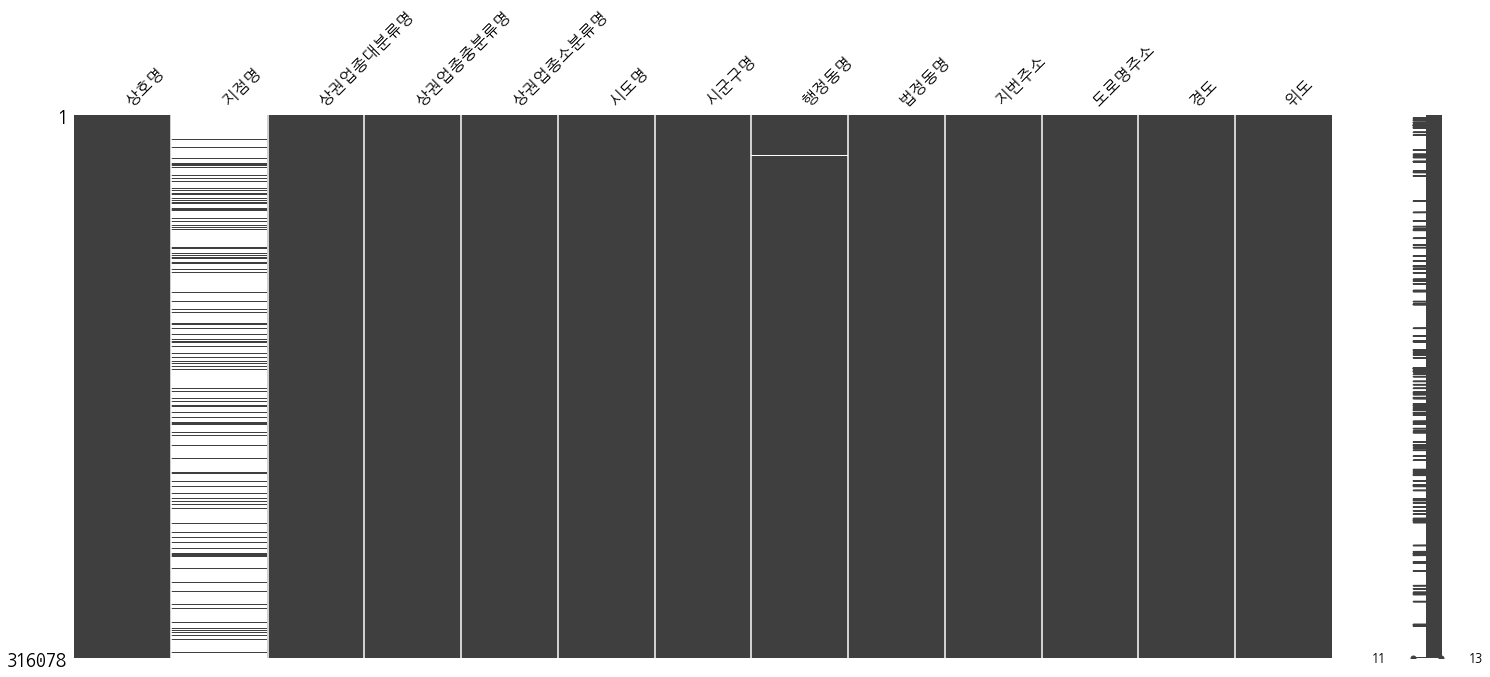

In [5]:
msno.matrix(seoul_business_filtered)

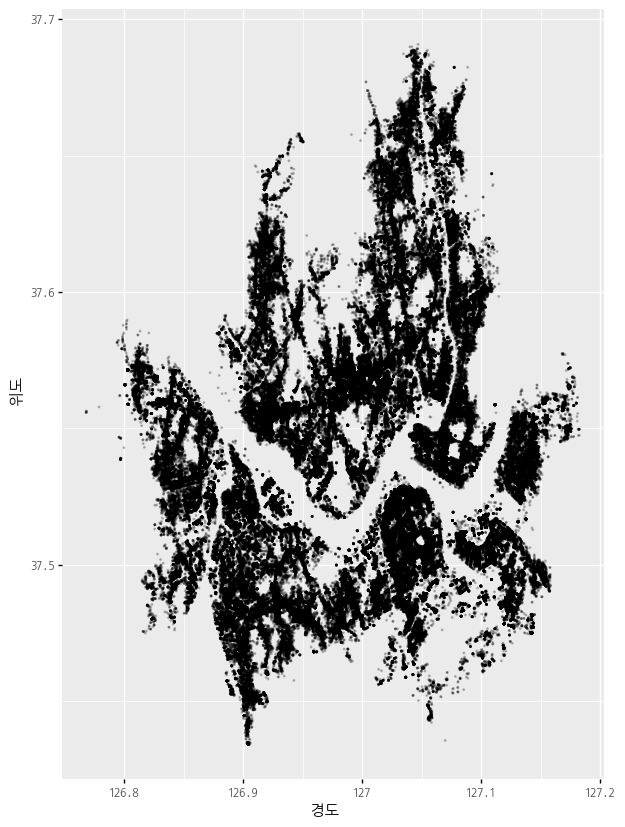

<ggplot: (145092074360)>

In [6]:
ggplot(seoul_business_filtered, aes(x = '경도', y = '위도')) \
    + geom_point(size = 0.2, alpha = 0.2)  \
    + theme(text = element_text(family = 'NanumGothicCoding'), figure_size = (7, 10))

<AxesSubplot:xlabel='경도', ylabel='위도'>

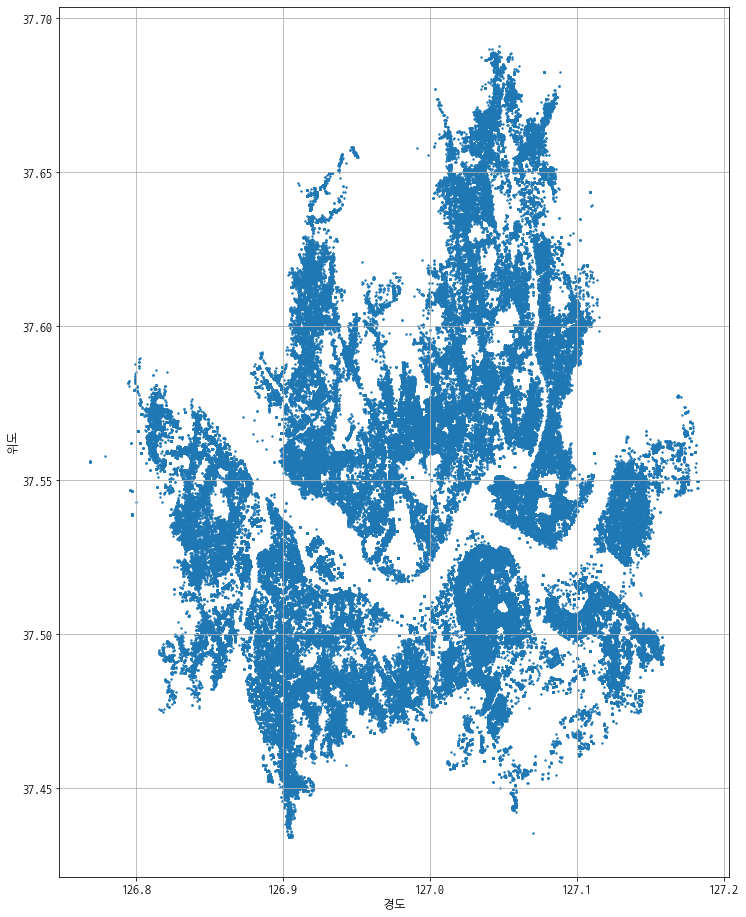

In [7]:
seoul_business_filtered.plot.scatter(x = '경도', y = '위도', grid = True, figsize = (12, 16), s = 2)

In [8]:
seoul_business_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316078 entries, 0 to 316077
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       316077 non-null  object 
 1   지점명       54615 non-null   object 
 2   상권업종대분류명  316078 non-null  object 
 3   상권업종중분류명  316078 non-null  object 
 4   상권업종소분류명  316078 non-null  object 
 5   시도명       316078 non-null  object 
 6   시군구명      316078 non-null  object 
 7   행정동명      315898 non-null  object 
 8   법정동명      316078 non-null  object 
 9   지번주소      316078 non-null  object 
 10  도로명주소     316078 non-null  object 
 11  경도        316078 non-null  float64
 12  위도        316078 non-null  float64
dtypes: float64(2), object(11)
memory usage: 31.3+ MB


In [9]:
business_except_seoul = seoul_business_filtered[seoul_business_filtered['도로명주소'].str.startswith('서울')]
business_except_seoul

상호명  지점명 상권업종대분류명      상권업종중분류명   상권업종소분류명    시도명  시군구명  \
0           비지트  NaN       음식            한식  한식/백반/한정식  서울특별시   서초구   
1          쓰리에프  NaN       음식            한식  한식/백반/한정식  서울특별시   동작구   
2            채움  NaN       음식            한식  한식/백반/한정식  서울특별시   종로구   
3         호구의주방  NaN       소매    가정/주방/인테리어     주방가구판매  서울특별시  영등포구   
4            다향  NaN       음식            한식  한식/백반/한정식  서울특별시   서초구   
...         ...  ...      ...           ...        ...    ...   ...   
316073    김씨네주방  NaN       음식            한식  한식/백반/한정식  서울특별시  서대문구   
316074    핫플레이스  NaN       음식            한식  한식/백반/한정식  서울특별시   마포구   
316075    경인철형사  NaN       소매  철물/난방/건설자재소매  철물/건설자재소매  서울특별시   강동구   
316076   솔시카고피자  NaN       음식         패스트푸드       피자전문  서울특별시   동작구   
316077  피자버거플러스  NaN       음식         패스트푸드       피자전문  서울특별시   용산구   

               행정동명   법정동명                    지번주소                  도로명주소  \
0              방배4동    방배동    서울특별시 서초구 방배동 854-18    서울특별시 서초구 동광로18길 82   
1              사당2동    사당동    서울특별시 동작구 사당동 139-72  서울특별시 동작구 동작대로27가길 12   
2       종로1.2.3.4가동    수송동        서울특별시 종로구 수송동 58       서울특별시 종로구 삼봉로 81   
3              양평2동  양평동4가  서울특별시 영등포구 양평동4가 160-2     서울특별시 영등포구 선유로 269   
4              서초3동    서초동    서울특별시 서초구 서초동 1485-3      서울특별시 서초구 효령로 230   
...             ...    ...                     ...                    ...   
316073         홍은2동    홍은동      서울특별시 서대문구 홍은동 456    서울특별시 서대문구 모래내로 309   
316074          연남동    연남동    서울특별시 마포구 연남동 515-24       서울특별시 마포구 연남로 29   
316075         성내3동    성내동    서울특별시 강동구 성내동 420-46       서울특별시 강동구 성안로 70   
316076        신대방1동   신대방동      서울특별시 동작구 신대방동 719    서울특별시 동작구 신대방1가길 38   
316077          보광동    보광동      서울특별시 용산구 보광동 81-2       서울특별시 용산구 보광로 15   

                경도         위도  
0       126.991394  37.488375  
1       126.980952  37.487105  
2       126.981794  37.572387  
3       126.897892  37.536700  
4       127.009382  37.483436  
...            ...        ...  
316073  126.931473  37.578889  
316074  126.921671  37.562230  
316075  127.131765  37.529776  
316076  126.906921  37.487893  
316077  127.000969  37.525913  

[316078 rows x 13 columns]

In [10]:
# '~'는 '~'가 아닌것을 의미한다
business_except_seoul = seoul_business_filtered[~seoul_business_filtered['도로명주소'].str.startswith('서울')]
business_except_seoul
# 서울만 있는 데이터

Empty DataFrame
Columns: [상호명, 지점명, 상권업종대분류명, 상권업종중분류명, 상권업종소분류명, 시도명, 시군구명, 행정동명, 법정동명, 지번주소, 도로명주소, 경도, 위도]
Index: []

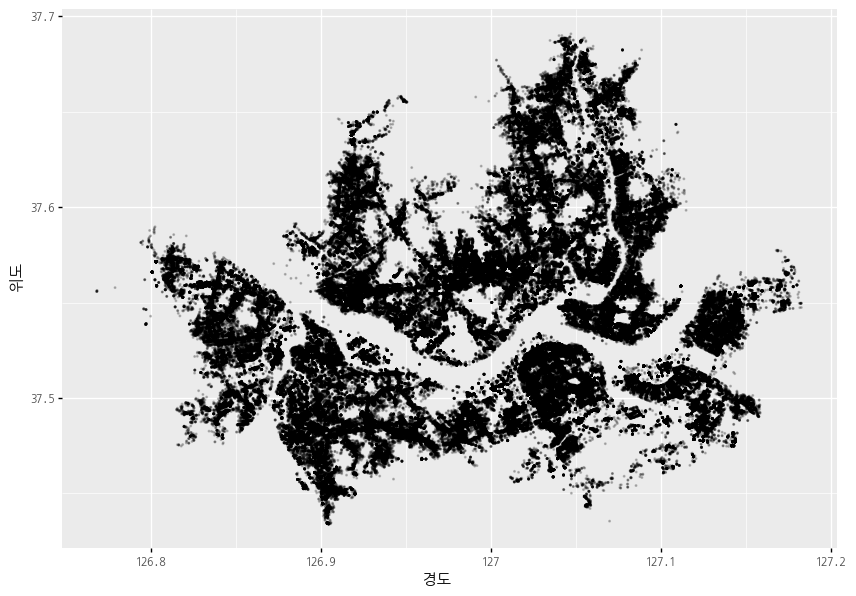

<ggplot: (-9223371891763780720)>

In [11]:
ggplot(seoul_business_filtered, aes(x = '경도', y = '위도')) \
    + geom_point(size = 0.2, alpha = 0.2) \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

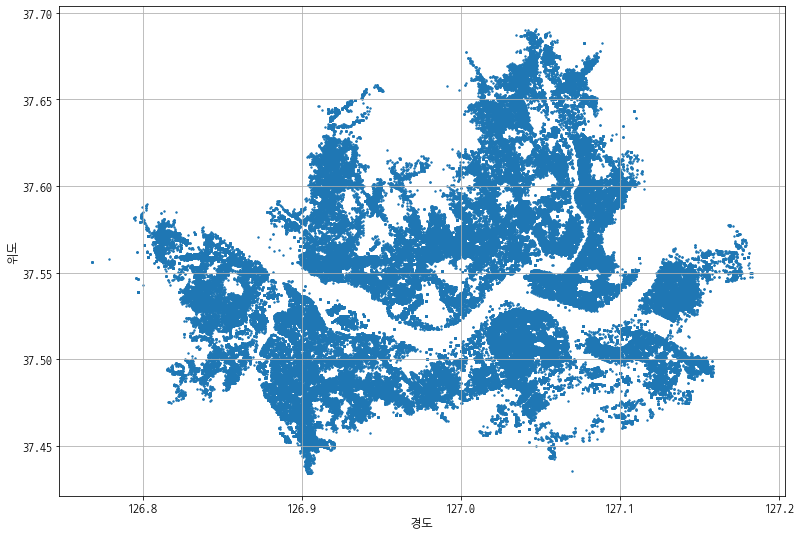

In [12]:
seoul_business_filtered.plot.scatter(x = '경도', y = '위도', grid = True, figsize=(13, 9), s = 2)

In [13]:
# 데이터프레임의 도로명주소를 활용해서 '시도', '구군' 열을 만든다
# split() 함수에 expand = True   #이걸 이용 안하면 series로 나오는데 이용하면 dataframe으로 나온다.
# '시도' 열과 '구군' 열을 만든다
# print(type(seoul_business_filtered[:1]['도로명주소'].str.split(' ', expand = True)))
# print(seoul_business_filtered[:1]['도로명주소'].str.split(' ', expand = True)[0])  #시군
# print(seoul_business_filtered[:1]['도로명주소'].str.split(' ', expand = True)[1])  #구군

seoul_business_filtered['시도'] = seoul_business_filtered['도로명주소'].str.split(' ', expand = True) [0]
seoul_business_filtered['구군'] = seoul_business_filtered['도로명주소'].str.split(' ', expand = True) [1]
seoul_business_filtered

상호명  지점명 상권업종대분류명      상권업종중분류명   상권업종소분류명    시도명  시군구명  \
0           비지트  NaN       음식            한식  한식/백반/한정식  서울특별시   서초구   
1          쓰리에프  NaN       음식            한식  한식/백반/한정식  서울특별시   동작구   
2            채움  NaN       음식            한식  한식/백반/한정식  서울특별시   종로구   
3         호구의주방  NaN       소매    가정/주방/인테리어     주방가구판매  서울특별시  영등포구   
4            다향  NaN       음식            한식  한식/백반/한정식  서울특별시   서초구   
...         ...  ...      ...           ...        ...    ...   ...   
316073    김씨네주방  NaN       음식            한식  한식/백반/한정식  서울특별시  서대문구   
316074    핫플레이스  NaN       음식            한식  한식/백반/한정식  서울특별시   마포구   
316075    경인철형사  NaN       소매  철물/난방/건설자재소매  철물/건설자재소매  서울특별시   강동구   
316076   솔시카고피자  NaN       음식         패스트푸드       피자전문  서울특별시   동작구   
316077  피자버거플러스  NaN       음식         패스트푸드       피자전문  서울특별시   용산구   

               행정동명   법정동명                    지번주소                  도로명주소  \
0              방배4동    방배동    서울특별시 서초구 방배동 854-18    서울특별시 서초구 동광로18길 82   
1              사당2동    사당동    서울특별시 동작구 사당동 139-72  서울특별시 동작구 동작대로27가길 12   
2       종로1.2.3.4가동    수송동        서울특별시 종로구 수송동 58       서울특별시 종로구 삼봉로 81   
3              양평2동  양평동4가  서울특별시 영등포구 양평동4가 160-2     서울특별시 영등포구 선유로 269   
4              서초3동    서초동    서울특별시 서초구 서초동 1485-3      서울특별시 서초구 효령로 230   
...             ...    ...                     ...                    ...   
316073         홍은2동    홍은동      서울특별시 서대문구 홍은동 456    서울특별시 서대문구 모래내로 309   
316074          연남동    연남동    서울특별시 마포구 연남동 515-24       서울특별시 마포구 연남로 29   
316075         성내3동    성내동    서울특별시 강동구 성내동 420-46       서울특별시 강동구 성안로 70   
316076        신대방1동   신대방동      서울특별시 동작구 신대방동 719    서울특별시 동작구 신대방1가길 38   
316077          보광동    보광동      서울특별시 용산구 보광동 81-2       서울특별시 용산구 보광로 15   

                경도         위도     시도    구군  
0       126.991394  37.488375  서울특별시   서초구  
1       126.980952  37.487105  서울특별시   동작구  
2       126.981794  37.572387  서울특별시   종로구  
3       126.897892  37.536700  서울특별시  영등포구  
4       127.009382  37.483436  서울특별시   서초구  
...            ...        ...    ...   ...  
316073  126.931473  37.578889  서울특별시  서대문구  
316074  126.921671  37.562230  서울특별시   마포구  
316075  127.131765  37.529776  서울특별시   강동구  
316076  126.906921  37.487893  서울특별시   동작구  
316077  127.000969  37.525913  서울특별시   용산구  

[316078 rows x 15 columns]

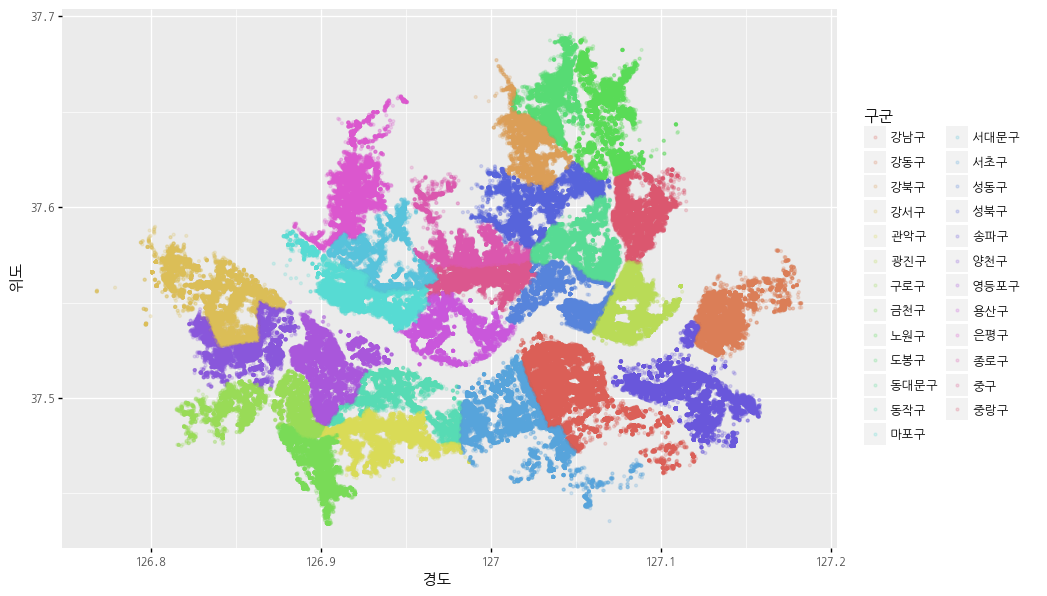

<ggplot: (145090999111)>

In [14]:
ggplot(seoul_business_filtered, aes(x = '경도', y = '위도', color = '구군')) \
    + geom_point(size = 0.7, alpha = 0.2)  \
    + theme(text = element_text(family = 'NanumGothicCoding'), figure_size = (10, 7))

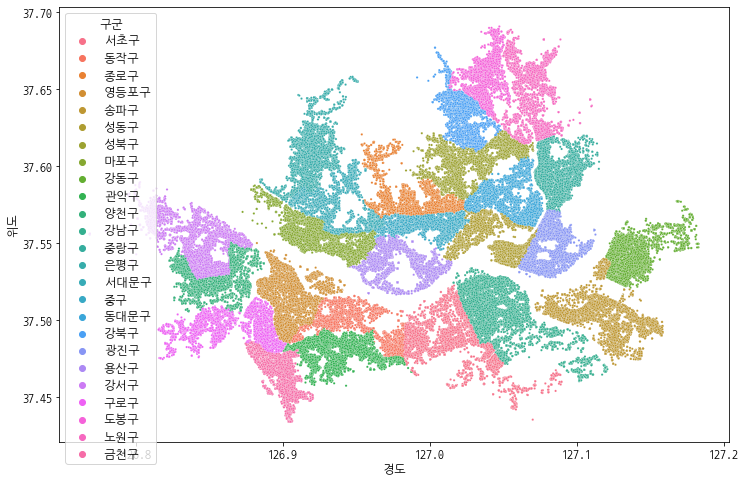

In [15]:
# seaborn 라이브러리를 이용한 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data = seoul_business_filtered, x = '경도', y = '위도', hue = '구군', s = 5)
plt.show()

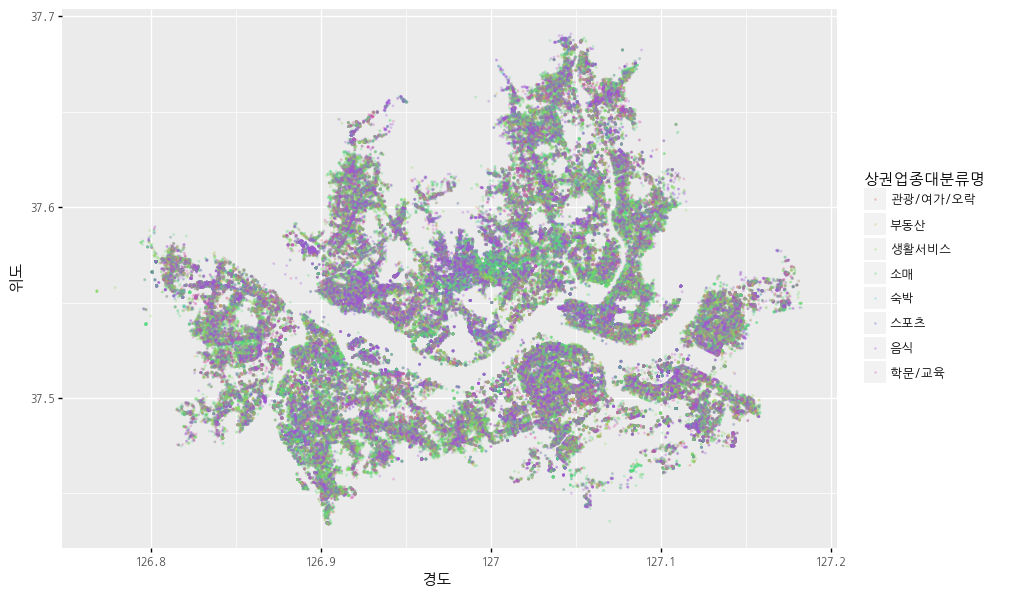

<ggplot: (-9223371891727906721)>

In [16]:
ggplot(seoul_business_filtered, aes( x = '경도', y = '위도', color = '상권업종대분류명'))  \
    +geom_point(size = 0.2, alpha = 0.2)  \
    +theme(text = element_text(family = 'NanumGothicCoding'), figure_size =( 10,7))


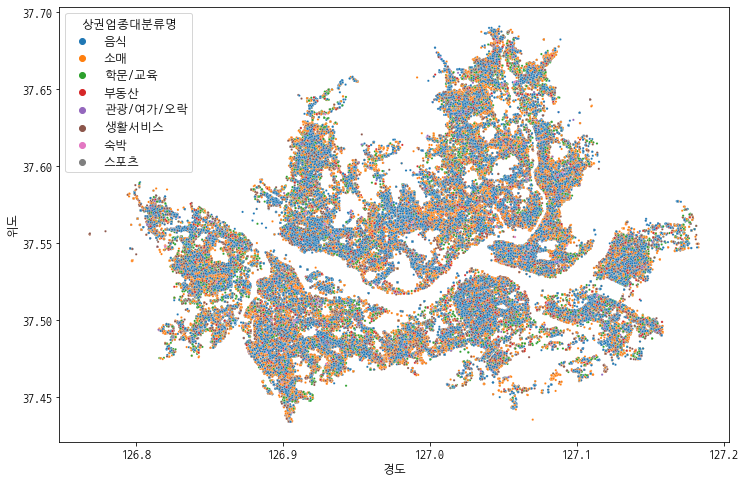

In [17]:
# seaborn 라이브러리를 이용한 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data = seoul_business_filtered, x = '경도', y = '위도', hue = '상권업종대분류명', s = 5)
plt.show()

In [18]:
# 학문/교육과 관련된 정보 보기
seoul_business_edu = seoul_business_filtered[seoul_business_filtered['상권업종대분류명'] == '학문/교육']
seoul_business_edu

상호명  지점명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  행정동명  \
8        김선희꼼꼼국어교습소  NaN    학문/교육  학원-보습교습입시      학원-입시  서울특별시   송파구  방이1동   
22            무비디자인  NaN    학문/교육  학원-창업취업취미     학원-디자인  서울특별시   마포구   대흥동   
26             힐리빙텔  NaN    학문/교육    도서관/독서실        독서실  서울특별시  서대문구   신촌동   
27          김샘수학교습소  NaN    학문/교육  학원-보습교습입시      학원-입시  서울특별시    중구  신당5동   
55          노벨수학교습소  NaN    학문/교육  학원-보습교습입시      학원-입시  서울특별시   마포구   아현동   
...             ...  ...      ...        ...        ...    ...   ...   ...   
315999    천년의미소미술학원  NaN    학문/교육  학원-음악미술무용   서예/서화/미술  서울특별시   마포구   서교동   
316015         해법영어  NaN    학문/교육      학원-어학   학원-어린이영어  서울특별시   서초구  방배1동   
316023     아이스피크어학원  NaN    학문/교육      학원-어학  학원-외국어/어학  서울특별시   강남구  대치1동   
316056  하브루타부모교육연구소  NaN    학문/교육       학원기타     학원(종합)  서울특별시   서초구  서초2동   
316057      블록체인컴퍼니  NaN    학문/교육       학원기타     학원(종합)  서울특별시   강남구  삼성1동   

        법정동명                   지번주소                  도로명주소          경도  \
8        방이동    서울특별시 송파구 방이동 197-3  서울특별시 송파구 위례성대로12길 31  127.121520   
22      노고산동  서울특별시 마포구 노고산동 107-17        서울특별시 마포구 백범로 8  126.936717   
26       대현동   서울특별시 서대문구 대현동 37-69   서울특별시 서대문구 이화여대5길 28  126.944057   
27       신당동       서울특별시 중구 신당동 851     서울특별시 중구 퇴계로90길 74  127.020965   
55       공덕동    서울특별시 마포구 공덕동 209-1   서울특별시 마포구 마포대로11길 41  126.951930   
...      ...                    ...                    ...         ...   
315999   서교동   서울특별시 마포구 서교동 337-36     서울특별시 마포구 와우산로 139  126.928750   
316015   방배동   서울특별시 서초구 방배동 935-19    서울특별시 서초구 방배로19길 16  126.994049   
316023   대치동   서울특별시 강남구 대치동 1024-2      서울특별시 강남구 도곡로 414  127.055912   
316056   서초동  서울특별시 서초구 서초동 1344-13    서울특별시 서초구 효령로72길 57  127.028468   
316057   삼성동    서울특별시 강남구 삼성동 145-9      서울특별시 강남구 삼성로 570  127.054121   

               위도     시도    구군  
8       37.510967  서울특별시   송파구  
22      37.553996  서울특별시   마포구  
26      37.558414  서울특별시  서대문구  
27      37.560996  서울특별시    중구  
55      37.549041  서울특별시   마포구  
...           ...    ...   ...  
315999  37.553969  서울특별시   마포구  
316015  37.485198  서울특별시   서초구  
316023  37.496783  서울특별시   강남구  
316056  37.487000  서울특별시   서초구  
316057  37.512393  서울특별시   강남구  

[21426 rows x 15 columns]

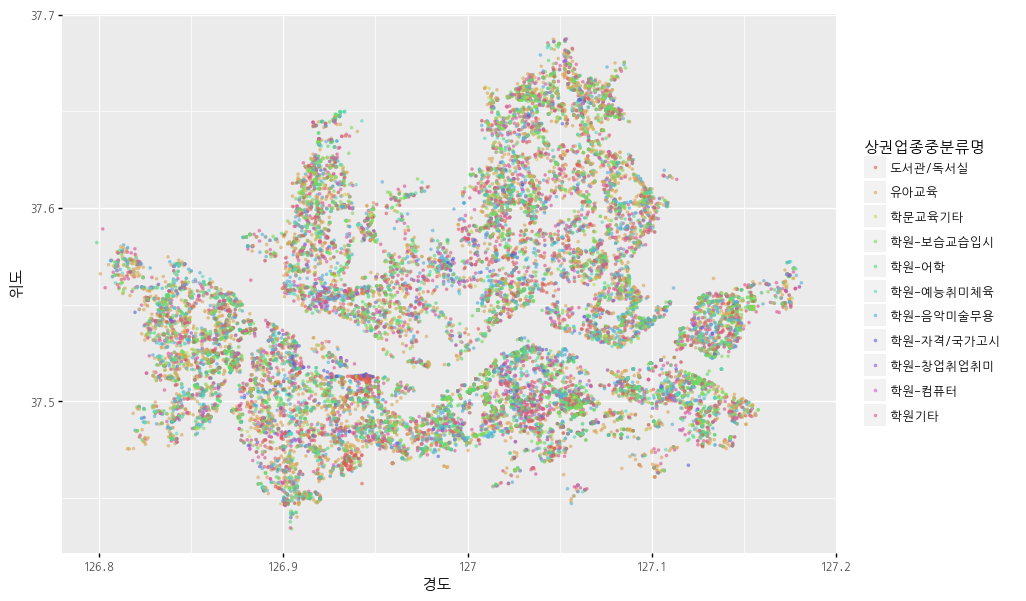

<ggplot: (-9223371891727810672)>

In [19]:
ggplot(seoul_business_edu, aes( x = '경도', y = '위도', color = '상권업종중분류명'))  \
    +geom_point(size = 0.5, alpha = 0.5)  \
    +theme(text = element_text(family = 'NanumGothicCoding'), figure_size =( 10,7))


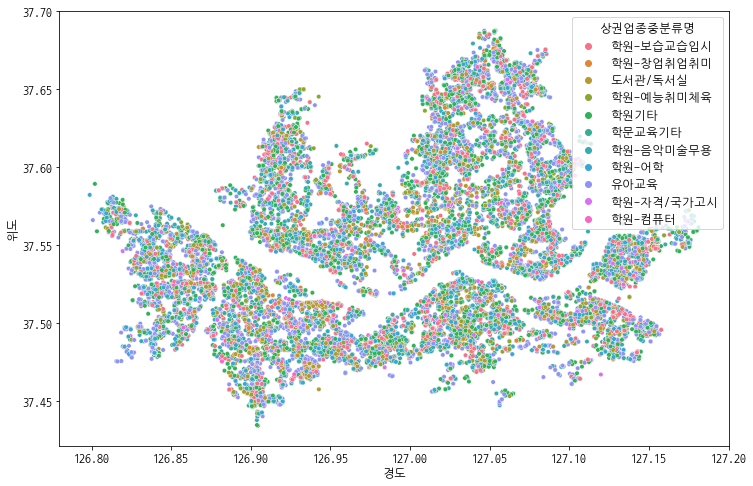

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = seoul_business_edu, x = '경도', y = '위도', hue = '상권업종중분류명', s = 20)
plt.show()

In [21]:
# 부동산 관련된 정보 보기
seoul_business_rstate = seoul_business_filtered[seoul_business_filtered['상권업종대분류명'] == '부동산']


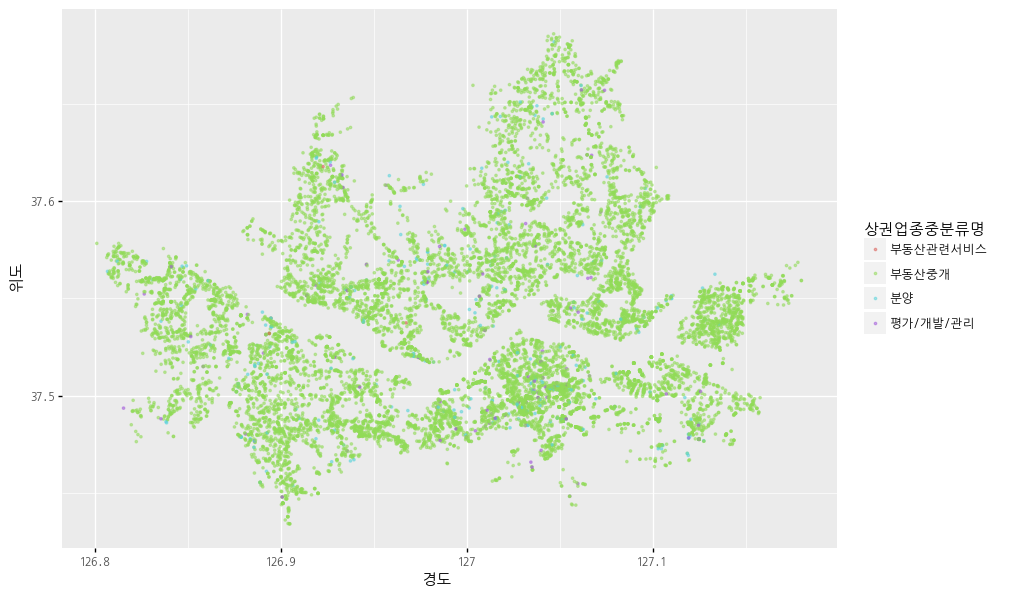

<ggplot: (145090989646)>

In [22]:
ggplot(seoul_business_rstate, aes( x = '경도', y = '위도', color = '상권업종중분류명'))  \
    +geom_point(size = 0.5, alpha = 0.5)  \
    +theme(text = element_text(family = 'NanumGothicCoding'), figure_size =( 10,7))


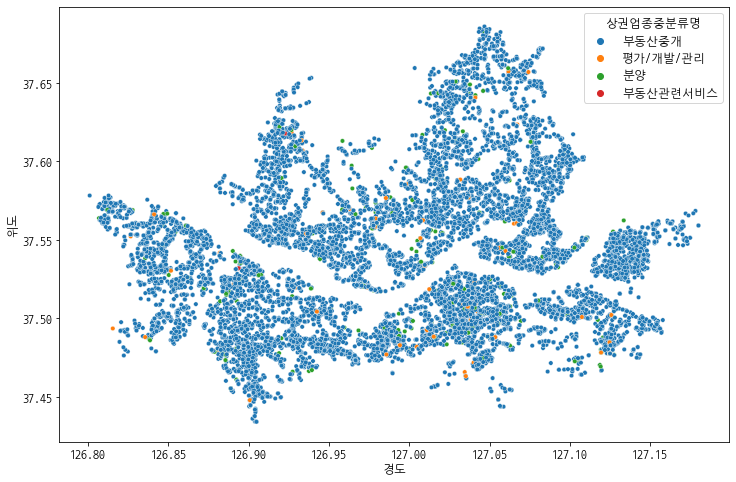

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = seoul_business_rstate, x = '경도', y = '위도', hue = '상권업종중분류명', s = 20)
plt.show()

In [24]:
# 학원 - 컴퓨터 
seoul_business_edu_computer = seoul_business_edu[seoul_business_edu['상권업종중분류명'] == '학원-컴퓨터'] 
seoul_business_edu_computer

상호명       지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명  \
5216        진원컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  양천구  신월5동   
5835            컴키드       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  강서구  등촌3동   
6021      대성컴퓨터회계학원   대성컴퓨터회계    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  관악구   인헌동   
8003        구로컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  금천구  시흥1동   
11064    하이미디어컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  구로구  구로2동   
...             ...       ...      ...      ...      ...    ...  ...   ...   
297526       아이야이앤씨       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  관악구   삼성동   
300504           학원  한큐에자바컴퓨터    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  강서구  발산1동   
304592  메가스터디IT아카데미       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  강남구  역삼1동   
309837           학원     영우컴퓨터    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  도봉구  방학1동   
313900     디지털컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  광진구   광장동   

       법정동명                   지번주소                 도로명주소          경도  \
5216    신월동     서울특별시 양천구 신월동 28-6      서울특별시 양천구 화곡로 41  126.826484   
5835    등촌동    서울특별시 강서구 등촌동 699-3  서울특별시 강서구 공항대로41길 44  126.845964   
6021    봉천동  서울특별시 관악구 봉천동 1657-24  서울특별시 관악구 남부순환로 1952  126.965659   
8003    시흥동   서울특별시 금천구 시흥동 870-10    서울특별시 금천구 시흥대로 266  126.899903   
11064   구로동    서울특별시 구로구 구로동 606-4     서울특별시 구로구 경인로 557  126.878990   
...     ...                    ...                   ...         ...   
297526  신림동      서울특별시 관악구 신림동 336     서울특별시 관악구 광신길 177  126.927220   
300504  마곡동    서울특별시 강서구 마곡동 799-1    서울특별시 강서구 공항대로 186  126.827978   
304592  역삼동   서울특별시 강남구 역삼동 818-12  서울특별시 강남구 강남대로94길 13  127.028406   
309837  방학동    서울특별시 도봉구 방학동 680-8     서울특별시 도봉구 도봉로 667  127.042282   
313900  광장동      서울특별시 광진구 광장동 565    서울특별시 광진구 아차산로 522  127.098968   

               위도     시도   구군  
5216    37.539544  서울특별시  양천구  
5835    37.559712  서울특별시  강서구  
6021    37.475943  서울특별시  관악구  
8003    37.457508  서울특별시  금천구  
11064   37.503103  서울특별시  구로구  
...           ...    ...  ...  
297526  37.467184  서울특별시  관악구  
300504  37.559084  서울특별시  강서구  
304592  37.499578  서울특별시  강남구  
309837  37.664033  서울특별시  도봉구  
313900  37.541803  서울특별시  광진구  

[159 rows x 15 columns]

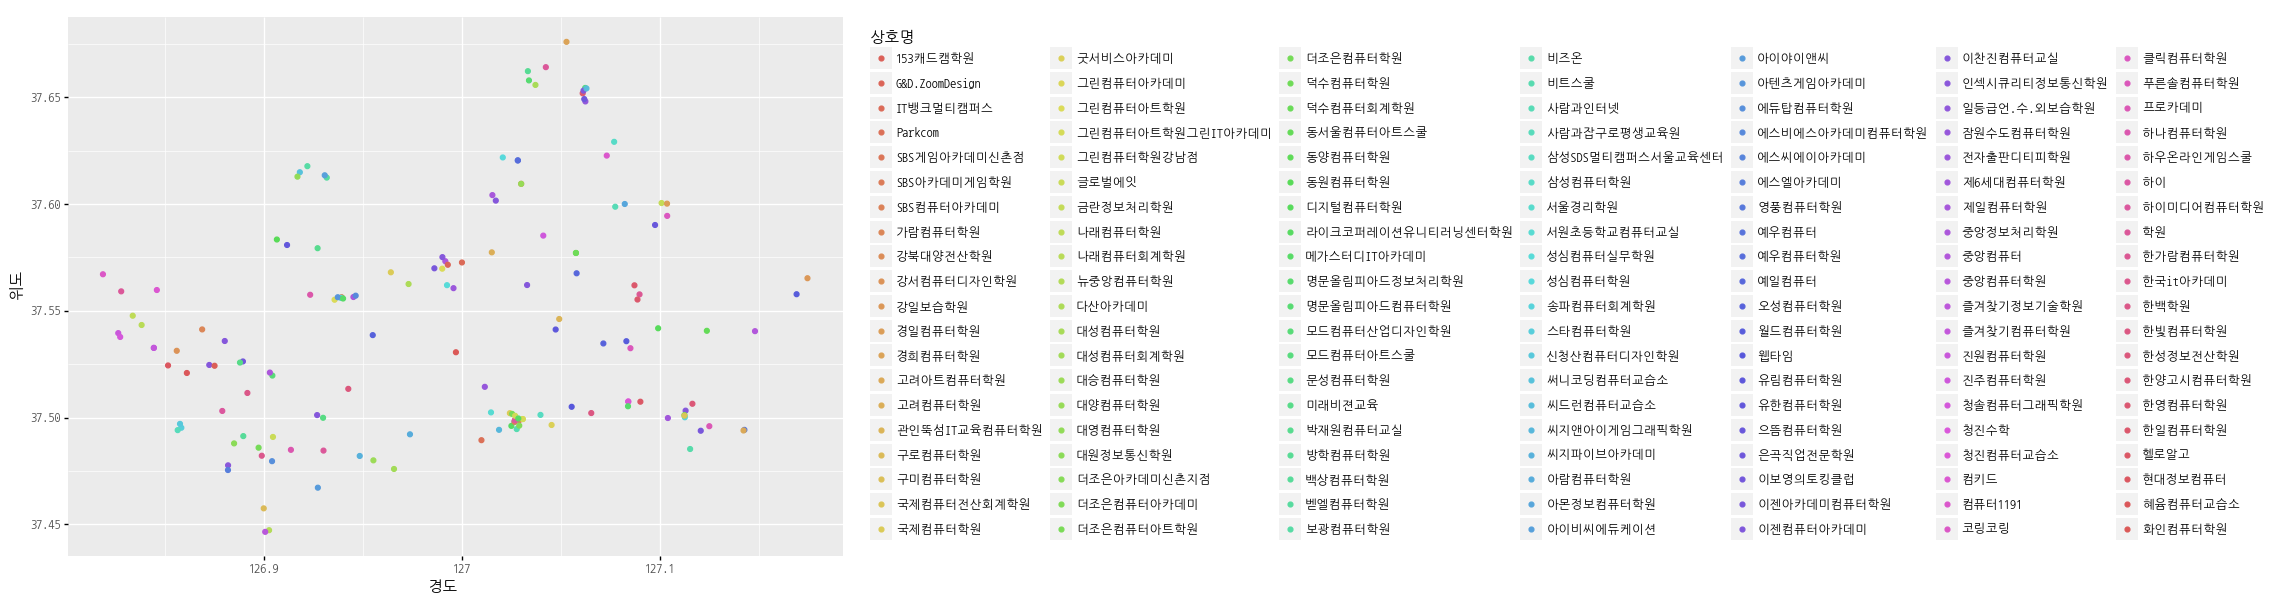

<ggplot: (-9223371891730305006)>

In [25]:
ggplot(seoul_business_edu_computer, aes( x = '경도', y = '위도', color = '상호명')) \
    + geom_point()   \
    + theme(text = element_text(family = 'NanumGothicCoding'), figure_size = (10, 7))

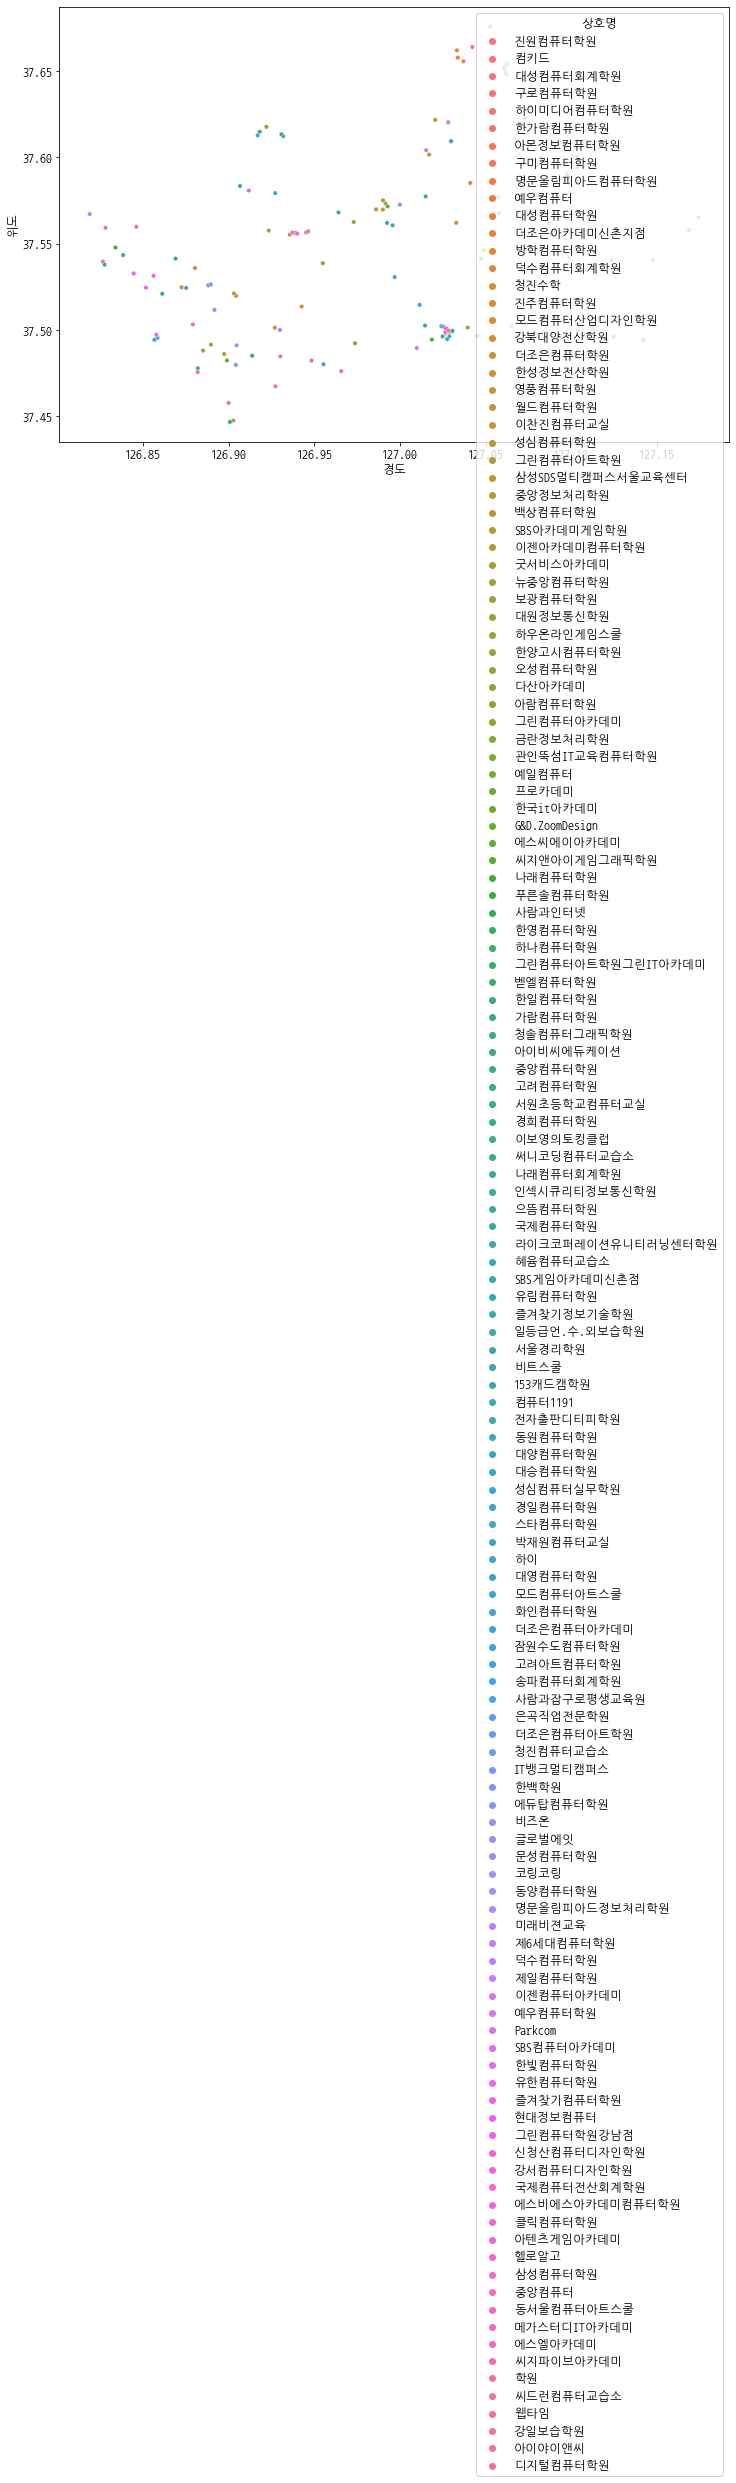

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = seoul_business_edu_computer, x = '경도', y = '위도', hue = '상호명', s = 20)
plt.show()

# 너무 데이터가 없어서 경도,위도로만 봤을때는 서울인지 아닌지 구별하기 힘들다 그래서 아까 사용한 folium을 사용한다

In [27]:
import folium

In [28]:
data = seoul_business_edu_computer
edu_map = folium.Map(location = [data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles = 'Stamen Terrain')

for i in data.index:
    edu_name = data.loc[i, '상호명'] + ' - ' + data.loc[i, '도로명주소']
    popup = folium.Popup(edu_name, max_width = 200)
    folium.Marker(location = [data.loc[i, '위도'], data.loc[i, '경도']], popup = popup).add_to(edu_map)
edu_map.save('./Output/edu_map.html')
edu_map

In [29]:
data

상호명       지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명  \
5216        진원컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  양천구  신월5동   
5835            컴키드       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  강서구  등촌3동   
6021      대성컴퓨터회계학원   대성컴퓨터회계    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  관악구   인헌동   
8003        구로컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  금천구  시흥1동   
11064    하이미디어컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  구로구  구로2동   
...             ...       ...      ...      ...      ...    ...  ...   ...   
297526       아이야이앤씨       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  관악구   삼성동   
300504           학원  한큐에자바컴퓨터    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  강서구  발산1동   
304592  메가스터디IT아카데미       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  강남구  역삼1동   
309837           학원     영우컴퓨터    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  도봉구  방학1동   
313900     디지털컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  광진구   광장동   

       법정동명                   지번주소                 도로명주소          경도  \
5216    신월동     서울특별시 양천구 신월동 28-6      서울특별시 양천구 화곡로 41  126.826484   
5835    등촌동    서울특별시 강서구 등촌동 699-3  서울특별시 강서구 공항대로41길 44  126.845964   
6021    봉천동  서울특별시 관악구 봉천동 1657-24  서울특별시 관악구 남부순환로 1952  126.965659   
8003    시흥동   서울특별시 금천구 시흥동 870-10    서울특별시 금천구 시흥대로 266  126.899903   
11064   구로동    서울특별시 구로구 구로동 606-4     서울특별시 구로구 경인로 557  126.878990   
...     ...                    ...                   ...         ...   
297526  신림동      서울특별시 관악구 신림동 336     서울특별시 관악구 광신길 177  126.927220   
300504  마곡동    서울특별시 강서구 마곡동 799-1    서울특별시 강서구 공항대로 186  126.827978   
304592  역삼동   서울특별시 강남구 역삼동 818-12  서울특별시 강남구 강남대로94길 13  127.028406   
309837  방학동    서울특별시 도봉구 방학동 680-8     서울특별시 도봉구 도봉로 667  127.042282   
313900  광장동      서울특별시 광진구 광장동 565    서울특별시 광진구 아차산로 522  127.098968   

               위도     시도   구군  
5216    37.539544  서울특별시  양천구  
5835    37.559712  서울특별시  강서구  
6021    37.475943  서울특별시  관악구  
8003    37.457508  서울특별시  금천구  
11064   37.503103  서울특별시  구로구  
...           ...    ...  ...  
297526  37.467184  서울특별시  관악구  
300504  37.559084  서울특별시  강서구  
304592  37.499578  서울특별시  강남구  
309837  37.664033  서울특별시  도봉구  
313900  37.541803  서울특별시  광진구  

[159 rows x 15 columns]

In [30]:
# 커피점 / 카페
seoul_business_eat = seoul_business_filtered[seoul_business_filtered['상권업종중분류명'] == '커피점/카페']
seoul_business_eat

상호명          지점명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명 시군구명  \
28             커피빈  코리아대학로대명거리점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  종로구   
111          요거프레소          쌍문점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  도봉구   
190          메머드커피          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시  마포구   
197          우성커피숍          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시  양천구   
225           카페클럽          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시  송파구   
...            ...          ...      ...      ...          ...    ...  ...   
315753  카페나무영우성균관대          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시  종로구   
315754   에이스타커피컴퍼니          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시  마포구   
315911          까치          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시  종로구   
315932  cafscoffee          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
315945         벨로샵          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시  마포구   

               행정동명  법정동명                  지번주소                도로명주소  \
28              혜화동  명륜4가     서울특별시 종로구 명륜4가 51     서울특별시 종로구 대명길 25   
111            쌍문2동   쌍문동      서울특별시 도봉구 쌍문동 20      서울특별시 도봉구 도당로 7   
190             서교동   서교동  서울특별시 마포구 서교동 327-15   서울특별시 마포구 와우산로 149   
197            신월4동   신월동   서울특별시 양천구 신월동 514-2     서울특별시 양천구 오목로 48   
225            문정1동   문정동    서울특별시 송파구 문정동 43-6  서울특별시 송파구 동남로2길 3-6   
...             ...   ...                   ...                  ...   
315753  종로1.2.3.4가동   원남동     서울특별시 종로구 원남동 103    서울특별시 종로구 율곡로 171   
315754          신수동   신수동   서울특별시 마포구 신수동 89-14   서울특별시 마포구 광성로4길 11   
315911         창신1동   창신동     서울특별시 종로구 창신동 372     서울특별시 종로구 종로 316   
315932         도곡2동   도곡동     서울특별시 강남구 도곡동 467  서울특별시 강남구 언주로30길 56   
315945          서강동   상수동   서울특별시 마포구 상수동 339-4     서울특별시 마포구 토정로 99   

                경도         위도     시도   구군  
28      127.000171  37.583149  서울특별시  종로구  
111     127.034746  37.658728  서울특별시  도봉구  
190     126.929692  37.554599  서울특별시  마포구  
197     126.842935  37.522055  서울특별시  양천구  
225     127.122480  37.488907  서울특별시  송파구  
...            ...        ...    ...  ...  
315753  126.998001  37.576103  서울특별시  종로구  
315754  126.937507  37.549399  서울특별시  마포구  
315911  127.012784  37.571965  서울특별시  종로구  
315932  127.053467  37.488059  서울특별시  강남구  
315945  126.922176  37.545259  서울특별시  마포구  

[20832 rows x 15 columns]

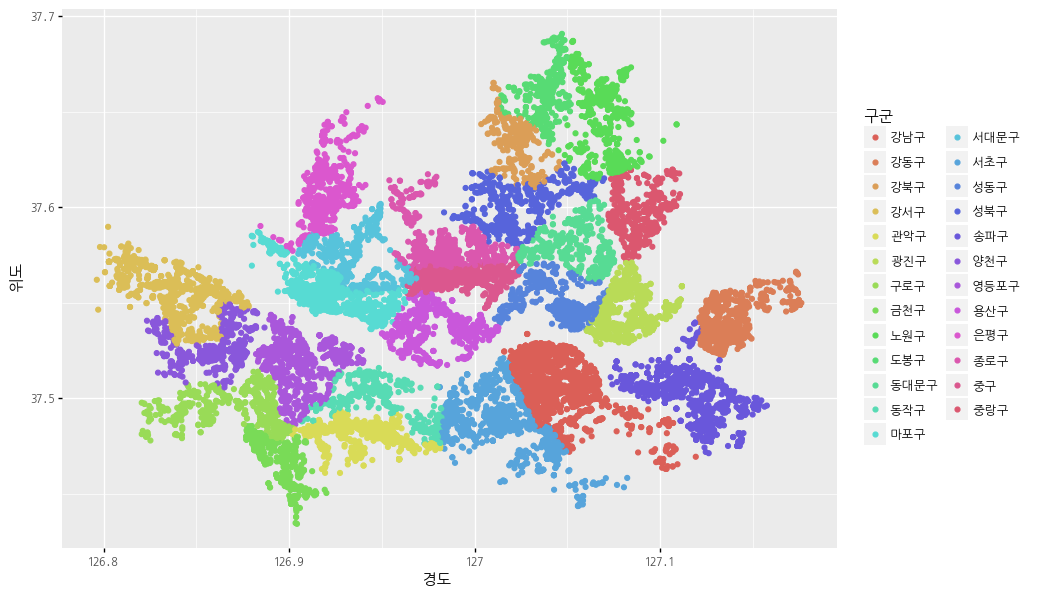

<ggplot: (-9223371891727000814)>

In [31]:
ggplot(seoul_business_eat, aes(x = '경도', y = '위도', color = '구군')) \
    + geom_point()    \
    + theme(text = element_text(family = 'NanumGothicCoding'), figure_size = (10, 7))

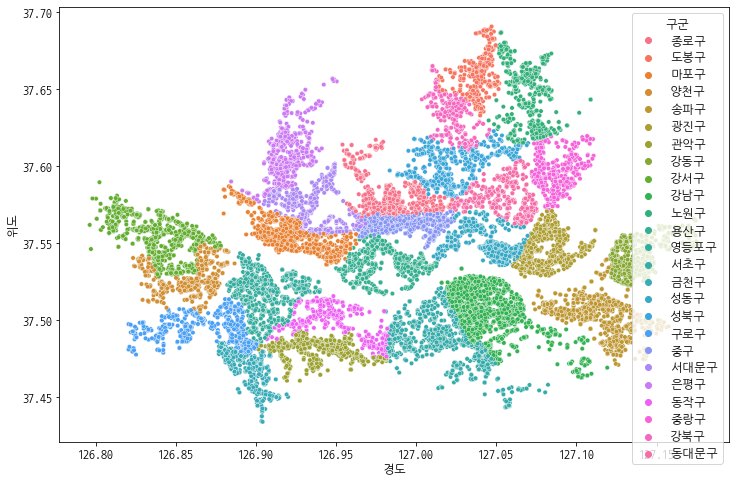

In [32]:
plt.figure(figsize= (12, 8))
sns.scatterplot(data = seoul_business_eat, x = '경도', y = '위도', hue = '구군', s = 20)
plt.show()

In [33]:
data = seoul_business_eat[seoul_business_eat['구군'] == '양천구']
cafe_map = folium.Map(location = [data['위도'].mean(), data['경도'].mean()], zoom_start=12)

for i in data.index:
    cafe_name = data.loc[i, '상호명'] + ' - ' + data.loc[i, '도로명주소']
    popup = folium.Popup(cafe_name, max_width = 200)
    folium.Marker(location = [data.loc[i, '위도'], data.loc[i, '경도']], popup = popup).add_to(cafe_map)
cafe_map.save('./Output/edu_map.html')
cafe_map